Model of bouting as published in the paper

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm

matplotlib.rcParams['figure.figsize'] = [12, 7]
matplotlib.rcParams['text.usetex'] = False


Parameters:

In [26]:
h = 0.005
tau1 = tau2 = tau = 0.06
sigma = 10.0
rho1 = -1.0
rho2 = 1.0
T = 50000

Simulation using Euler's method

In [27]:
# Map
f = lambda t, x: np.array([-tau*x[0] + (1.0 - x[0])*np.exp(-sigma*(x[2] - rho1)**2),
                  -tau*x[1] + (1.0 - x[1])*np.exp(-sigma*(x[2] - rho2)**2),
                  -(x[2] - rho1)*(x[2] - rho2)*(x[2] - (rho1+rho2)/2.0) - 
                    0.5*(1-x[0])*(x[2] - rho1) - 0.5*(1-x[1])*(x[2] - rho2)])

In [28]:
def integrate( f, T, x0 ):
    X = np.zeros((len(x0), T))
    time = np.zeros(T)
    X[:,0] = x0

    for i in range(T-1):
        k1 = f(time[i], X[:,i])
        k2 = f(time[i] + h/2.0, X[:,i] + h*k1/2.0)
        k3 = f(time[i] + h/2.0, X[:,i] + h*k2/2.0)
        k4 = f(time[i] + h, X[:,i] + h*k3)
        X[:, i+1] = X[:,i] + h*(k1 + 2*k2 + 2*k3 + k4)/6.0
        time[i+1] = time[i] + h
        
    return time, X

t, X = integrate( f, T, [1.0, 0.0, 0.5] )

0.0005148923322822734


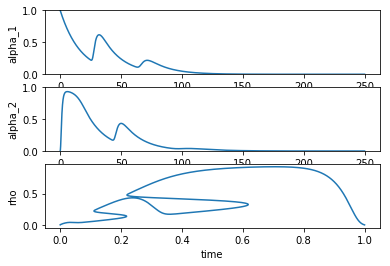

In [29]:
fig, ax = plt.subplots(3, 1)
ax[0].plot(t, X[0,:])
ax[0].set_xlabel('time')
ax[0].set_ylabel('alpha_1')
ax[0].set_ylim((0, 1))

ax[1].plot(t, X[1,:])
ax[1].set_xlabel('time')
ax[1].set_ylabel('alpha_2')
ax[1].set_ylim((0, 1))

ax[2].plot(X[0,:],X[1,:])
# ax[2].plot(t, X[2,:])
ax[2].set_xlabel('time')
ax[2].set_ylabel('rho')
# ax[2].set_ylim((-1, 1))

print np.max(X[0,int(2*T/3):])-np.min(X[0,int(2*T/3):])

Now adding the gradient:

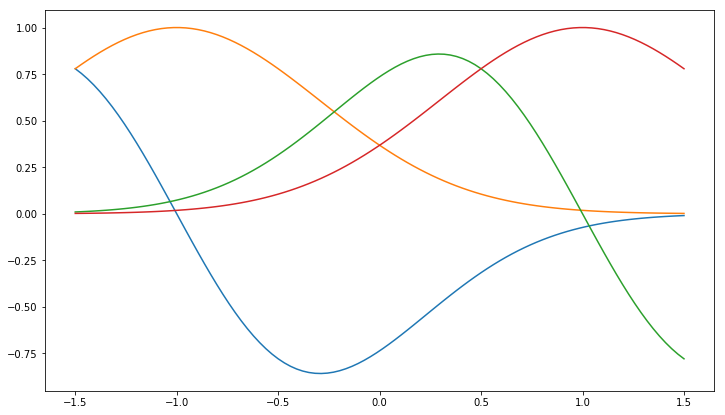

In [1380]:
tau1 = 0.01
tau2 = 0.03
rho1 = 0.0
rho2 = 1.0
x1 = 1.0
x2 = -1.0
gs = 1.0
G = lambda x: np.exp(-gs*(x - x1)**2)
F = lambda x: np.exp(-gs*(x - x2)**2)
DG = lambda x: -2.0*gs*(x - x1)*np.exp(-gs*(x - x1)**2)
DF = lambda x: -2.0*gs*(x - x2)*np.exp(-gs*(x - x2)**2)

g = lambda t, y: np.array([-tau1*y[0] + (1.0 - y[0])*G(y[3]),
                           -tau2*y[1] + (1.0 - y[1])*F(y[3]),
                           -(y[2] - rho1)*(y[2] - rho2)*(y[2] - (rho1+rho2)/2.0) - 0.5*(1-y[0])*(y[2] - rho1) - 0.5*(1-y[1])*(y[2] - rho2),
                           1.0*(y[2]*DF(y[3]) + (1.0 - y[2])*DG(y[3])) - 0.0*( y[2]*DG(y[3]) - (1.0 - y[2])*DF(y[3])) ])
# g = lambda t, y: np.array([0,0,DF(y[2]),DG(y[3]) ])

t, X = integrate( g, T, [0.0, 0.0, 0.3, 0.0] )

x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, DF(x))
plt.plot(x, F(x))
plt.plot(x, DG(x))
plt.plot(x, G(x))
plt.show()

(-1.1, 1.1)

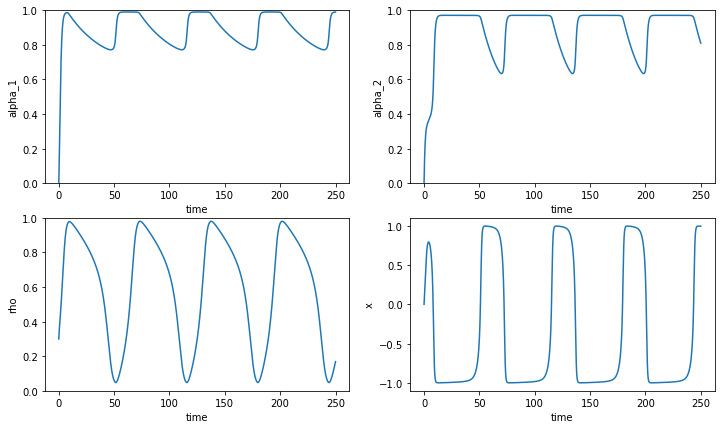

In [1381]:
fig, ax = plt.subplots(2, 2)
ax[0,0].plot(t, X[0,:])
ax[0,0].set_xlabel('time')
ax[0,0].set_ylabel('alpha_1')
ax[0,0].set_ylim((0, 1))

ax[0,1].plot(t, X[1,:])
ax[0,1].set_xlabel('time')
ax[0,1].set_ylabel('alpha_2')
ax[0,1].set_ylim((0, 1))

ax[1,0].plot(t, X[2,:])
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('rho')
ax[1,0].set_ylim((0, 1))

ax[1,1].plot(t, X[3,:])
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('x')
ax[1,1].set_ylim((-1.1, 1.1))

No simulation of the potential in a two dimensional domain and the proof that the corresponding coordinates stay on a line (Are affine)

Text(0.5,1,'Conservation law')

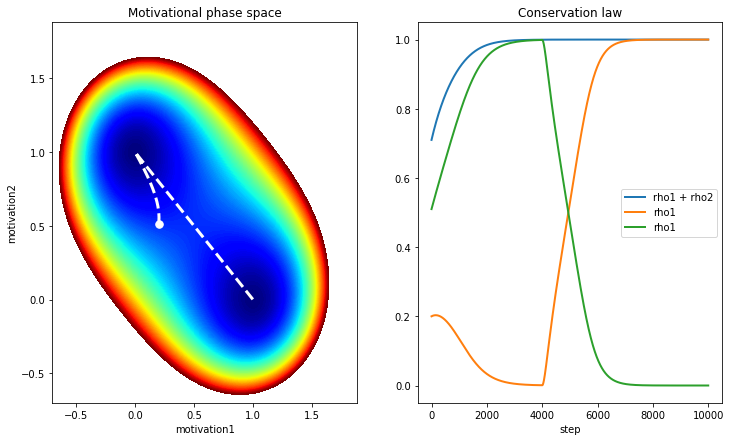

In [1382]:
a = 0.0
b = 0.0
r1 = np.array([1, 0])
r2 = np.array([0, 1])
nr = lambda X, Y, r: (X - r[0])**2 + (Y - r[1])**2 
phi = lambda X,Y, a, b:nr(X,Y,r1)*nr(X,Y,r2) + a*nr(X,Y,r1)**2 + b*nr(X,Y,r2)
dp = lambda rho, a, b: -0.1*np.array([2*(rho[0]-1)*(rho[0]**2 + (rho[1] - 1)**2) + 2*rho[0]*((rho[0] - 1)**2 + rho[1]**2) + 2*a*(rho[0]-1) + 2*b*rho[0],
                  2*(rho[1]-1)*(rho[1]**2 + (rho[0] - 1)**2) + 2*rho[1]*((rho[1] - 1)**2 + rho[0]**2) + 2*b*(rho[1]-1) + 2*a*rho[1]])

T = 10000
rho = np.zeros((2, T))
rho0 = [0.2, 0.51]
rho[:,0] = rho0
x = y = np.arange(-0.7, 1.9, 0.02)
X, Y = np.meshgrid(x, y)
Z = phi(X,Y, a, b)
fig, ax = plt.subplots(1,2)
ax[0].contourf(X, Y, Z, levels = np.arange(0, 1.5, 0.01), cmap = plt.cm.jet)

for i in range(T-1):
    rho[:,i + 1] = rho[:,i] + h*dp(rho[:,i], a , b)
    
    if i > 4000:
        a += 0.01*(1 - a)


ax[0].plot(rho[0,:], rho[1,:], 'w--', linewidth = 3.0)
ax[0].plot(rho[0,0], rho[1,0], 'w.', markersize = 15.0)
ax[0].set_xlabel('motivation1')
ax[0].set_ylabel('motivation2')
ax[0].set_title('Motivational phase space')

ax[1].plot(rho[0,:] + rho[1,:], linewidth = 2.0, label = 'rho1 + rho2')
ax[1].plot(rho[0,:], linewidth = 2.0, label = 'rho1')
ax[1].plot(rho[1,:], linewidth = 2.0, label = 'rho1')
ax[1].legend()
ax[1].set_xlabel('step')
ax[1].set_title('Conservation law')

Now simulation in the two dimensional plane

In [1384]:
T = 80000
mu1 = 0.01
mu2 = 0.01
gamma1 = 1.0
gamma2 = 1.0
e = 1.0
rho1 = np.array([1.0, 0.0])
rho2 = np.array([0.0, 1.0])
L = 1.0
x1 = np.array([1.0, 1.0])
x2 = np.array([-1.0, -1.0])
gs = 0.5

G = lambda x,y: np.exp(-gs*((x - x1[0])**2 + (y - x1[1])**2))
F = lambda x,y: np.exp(-gs*((x - x2[0])**2 + (y - x2[1])**2))
# G = lambda x,y: (gs/np.pi)*1.0/((x - x1[0])**2 + (y - x1[1])**2 + gs**2)
# F = lambda x,y: (gs/np.pi)*1.0/((x - x2[0])**2 + (y - x2[1])**2 + gs**2)

DG = lambda x: np.array([-2.0*gs*(x[0] - x1[0])*np.exp(-gs*np.linalg.norm(x - x1)**2), 
                         -2.0*gs*(x[1] - x1[1])*np.exp(-gs*np.linalg.norm(x - x1)**2)])
DF = lambda x: np.array([-2.0*gs*(x[0] - x2[0])*np.exp(-gs*np.linalg.norm(x - x2)**2), 
                         -2.0*gs*(x[1] - x2[1])*np.exp(-gs*np.linalg.norm(x - x2)**2)])

# DG = lambda x: np.array([-2.0*(gs/np.pi)*(x[0] - x1[0])*1.0/(np.linalg.norm(x - x1)**2 + gs**2), 
#                          -2.0*(gs/np.pi)*(x[1] - x1[1])*1.0/(np.linalg.norm(x - x1)**2 + gs**2)])
# DF = lambda x: np.array([-2.0*(gs/np.pi)*(x[0] - x2[0])*1.0/(np.linalg.norm(x - x2)**2 + gs**2), 
#                          -2.0*(gs/np.pi)*(x[1] - x2[1])*1.0/(np.linalg.norm(x - x2)**2 + gs**2)])
c = 1.0
def g(t, theta):
    a1 = theta[0]
    a2 = theta[1]
    rhox = theta[2]
    rhoy = theta[3]
    x = theta[4]
    y = theta[5]
    
    psy = np.array([e*(-mu1*a1 + (gamma1)*(1-a1)*(np.exp(-sigma*((rhoy)**2))*(0.01 + F(x, y)))),
                    e*(-mu2*a2 + (gamma2)*(1-a2)*(np.exp(-sigma*((rhox)**2))*(0.01 + G(x, y)))),
                    -2.0*L*((rhox-c)*(rhox**2 + (rhoy - c)**2) + rhox*((rhox - c)**2 + rhoy**2) + (1-a1)*(rhox-c) + (1-a2)*rhox),
                    -2.0*L*((rhoy-c)*(rhoy**2 + (rhox - c)**2) + rhoy*((rhoy - c)**2 + rhox**2) + (1-a2)*(rhoy-c) + (1-a1)*rhoy)])
    motor =  1.0*(rhox*DF(np.array([x, y])) + rhoy*DG(np.array([x, y])))
    return np.concatenate([psy, motor])

#- (1-y[3])*DG(np.array([y[4], y[5]])) - (1.0-y[2])*DF(np.array([y[4], y[5]]))
# g = lambda t, y: np.array([0,0,DF(y[2]),DG(y[3]) ])

t, X = integrate( g, T, [0.0, 1.0, 0.3, 1.0, 1.0, -0.5] )

print(X)

[[ 0.00000000e+00  3.27786411e-08  7.32195550e-08 ...  7.74615033e-01
   7.74753170e-01  7.74891591e-01]
 [ 1.00000000e+00  9.99950018e-01  9.99900072e-01 ...  8.96760817e-01
   8.96716022e-01  8.96671229e-01]
 [ 3.00000000e-01  3.03165265e-01  3.06341562e-01 ...  9.50804062e-01
   9.50776801e-01  9.50749527e-01]
 [ 1.00000000e+00  9.89228725e-01  9.78705614e-01 ...  4.91959382e-02
   4.92231994e-02  4.92504727e-02]
 [ 1.00000000e+00  9.99640216e-01  9.99277452e-01 ...  3.75754697e-01
   3.74872472e-01  3.73988603e-01]
 [-5.00000000e-01 -4.97666156e-01 -4.95354963e-01 ...  3.75754697e-01
   3.74872472e-01  3.73988603e-01]]


Text(0.5,1,'Drive 2')

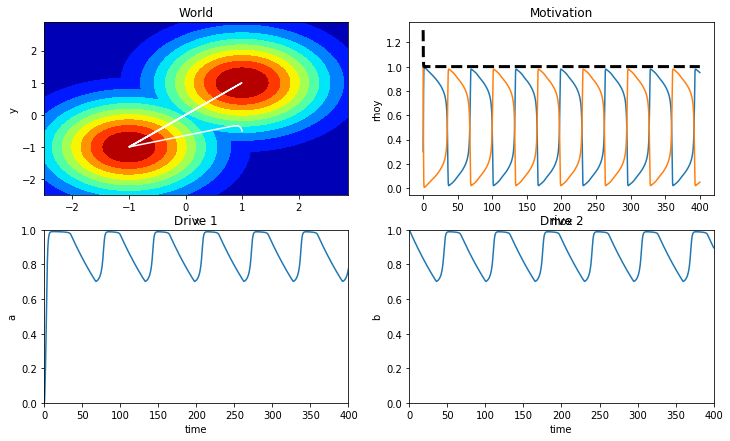

In [1385]:
fig, ax = plt.subplots(2,2)
x = y = np.arange(-2.5, 2.9, 0.02)
xx, yy = np.meshgrid(x, y)
Z = G(xx,yy)
# ax[0,0].contourf(xx, yy, Z, levels = np.arange(0, 1.5, 0.01), cmap = plt.cm.jet)
Z = np.maximum(F(xx,yy), G(xx, yy))
ax[0,0].contourf(xx, yy, Z, 10, cmap = plt.cm.jet)

ax[0,0].plot(X[4,:], X[5,:], color = 'white')
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('y')
ax[0,0].set_title('World')
ax[0,1].plot(t, X[2,:])
ax[0,1].plot(t, X[3,:])
ax[0,1].plot(t, X[3,:]+X[2,:], 'k--', linewidth = 3.0 )
ax[0,1].set_xlabel('rhox')
ax[0,1].set_ylabel('rhoy')
ax[0,1].set_title('Motivation')
ax[1,0].plot(t, X[0,:])
ax[1,0].axis([0, T*h, 0, 1])
ax[1,0].set_xlabel('time')
ax[1,0].set_ylabel('a')
ax[1,0].set_title('Drive 1')
ax[1,1].plot(t, X[1,:])
ax[1,1].axis([0, T*h, 0, 1])
ax[1,1].set_xlabel('time')
ax[1,1].set_ylabel('b')
ax[1,1].set_title('Drive 2')

# fig = figure()


/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


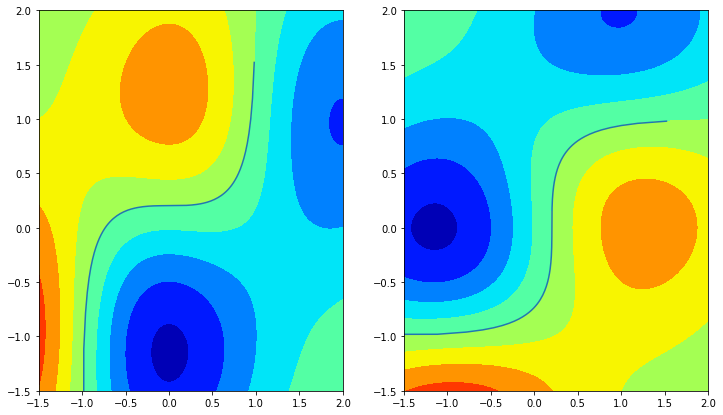

In [1386]:
fig, ax = plt.subplots(1,2)
rhox = 0.4
rhoy = 1 - rhox
x1 = np.array([1.0, 1.0])
x2 = np.array([-1.0, -1.0])
DGx = lambda x,y: -2.0*gs*(x - x1[0])*np.exp(-gs*((x - x1[0])**2 + (y - x1[1])**2)) 
DGy = lambda x,y: -2.0*gs*(y - x1[1])*np.exp(-gs*((x - x1[0])**2 + (y - x1[1])**2))
DFx = lambda x,y: -2.0*gs*(x - x2[0])*np.exp(-gs*((x - x2[0])**2 + (y - x2[1])**2)) 
DFy = lambda x,y: -2.0*gs*(y - x2[1])*np.exp(-gs*((x - x2[0])**2 + (y - x2[1])**2))

dHx = lambda x, y: rhox*DGx(x, y) + rhoy*DFx(x, y)
dHy = lambda x, y: rhox*DGy(x, y) + rhoy*DFy(x, y)

x = y = np.arange(-2.5, 2.9, 0.02)
xx, yy = np.meshgrid(x, y)
Zx = dHx(xx, yy)
Zy = dHy(xx, yy)

b1 = lambda x: -np.log(-(rhox/rhoy)*(x - x1[0])/(x - x2[0]))/(2.0*gs) + (x1[0]**2 - x2[0]**2 + x1[1]**2 - x2[1]**2)/2.0
yb1 = lambda x: -((x1[0] - x2[0])/(x1[1] - x2[1]))*x + b1(x)/(x1[1] - x2[1])
b2 = lambda y: -np.log(-(rhox/rhoy)*(y - x1[1])/(y - x2[1]))/(2.0*gs) + (x1[0]**2 - x2[0]**2 + x1[1]**2 - x2[1]**2)/2.0
yb2 = lambda y: -((x1[1] - x2[1])/(x1[0] - x2[0]))*y + b1(y)/(x1[0] - x2[0])

ax[0].contourf(xx, yy, Zx, 10, cmap = plt.cm.jet)
ax[0].plot(x, yb1(x))
# plt.contourf(xx, yy, Zy, levels =[-2,-1,0, 1], cmap = plt.cm.jet)
# ax[0].colorbar()
ax[0].axis([-1.5, 2.0, -1.5, 2.0])

ax[1].contourf(xx, yy, Zy, 10, cmap = plt.cm.jet)
ax[1].plot(yb2(y), y)
# plt.contourf(xx, yy, Zy, levels =[-2,-1,0, 1], cmap = plt.cm.jet)
# ax[0].colorbar()
ax[1].axis([-1.5, 2.0, -1.5, 2.0])
plt.show()


Now dynamics of a simple agent

0.21225215825719396


/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in log


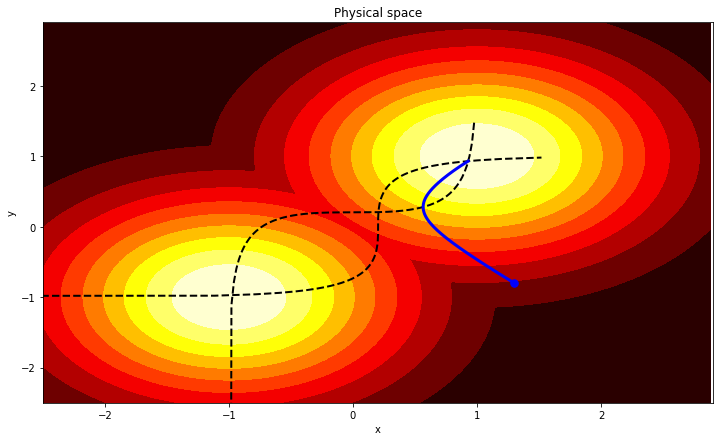

In [1387]:
T = 10000
g = lambda t, theta: np.array([dHx(theta[0], theta[1]), dHy(theta[0], theta[1])])
s = 0.3
print(yb2(s))
t, X = integrate(g, T, [1.3, -0.8])
x = y = np.arange(-2.5, 2.9, 0.02)
xx, yy = np.meshgrid(x, y)
# ax[0,0].contourf(xx, yy, Z, levels = np.arange(0, 1.5, 0.01), cmap = plt.cm.jet)
Z = np.maximum(F(xx,yy), G(xx, yy))
plt.contourf(xx, yy, Z, 10, cmap = plt.cm.hot)
plt.plot(x, yb1(x), '--', color = (0,0,0), linewidth = 2.0)
plt.plot(yb2(y), y, '--', color = (0,0,0), linewidth = 2.0)
plt.plot(X[0,:], X[1,:], color = (0,0,1), linewidth = 3.0)
plt.plot(X[0,0], X[1,0], '.', color = (0,0,1), markersize = 15)
plt.axis([-2.5, 2.9, -2.5, 2.9])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Physical space')
plt.show()

The condition for existence of equilibrium

[0.20571019 0.20571019]


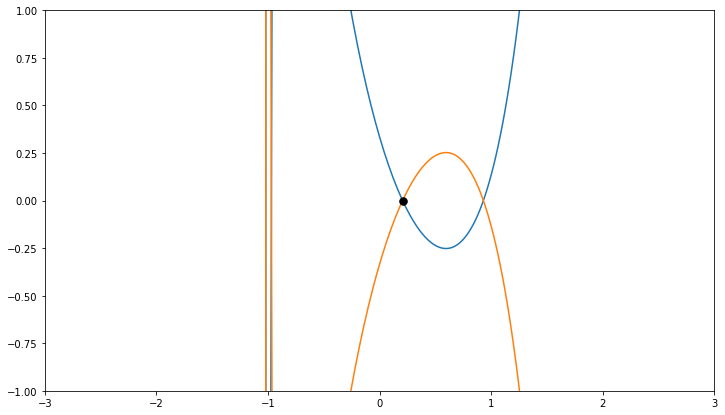

In [1388]:
# x = np.linspace(-0.9, 1, 100)
from scipy.optimize import fsolve

a = (x1[0]**2 - x2[0]**2)/2.0 + (x1[1]**2 - x2[1]**2)/2.0

g1 = lambda x, y: -(rhox/rhoy)*((y - x1[1])/(y - x2[1]))*np.exp(2.0*gs*(x1[1]-x2[1])*y) - np.exp(-2*gs*((x1[0] - x2[0])*x - a))
g2 = lambda x, y: -(rhox/rhoy)*((x - x1[0])/(x - x2[0]))*np.exp(2.0*gs*(x1[0]-x2[0])*x) - np.exp(-2*gs*((x1[1] - x2[1])*y - a))

def equations(p):
    x, y = p
    return (g1(x, y), g2(x, y))

res = fsolve(equations, (-0.9, -0.9))
print (res)


f1 = lambda x: np.exp(-2*gs*((x1[0] - x2[0])*x - a)) + (rhox/rhoy)*((x - x1[0])/(x - x2[0]))*np.exp(2.0*gs*(x1[0]-x2[0])*x)
f2 = lambda y: -(rhox/rhoy)*((y - x1[1])/(y - x2[1]))*np.exp(2.0*gs*(x1[1]-x2[1])*y) - np.exp(-2*gs*((x1[1] - x2[1])*y - a))

plt.plot(x, f1(x))
plt.plot(x, f2(x))
plt.plot(res[0], 0, 'k.', markersize = 15)
plt.axis([-3.0, 3.0, -1.0, 1.0])
plt.show()

A simplified phase space

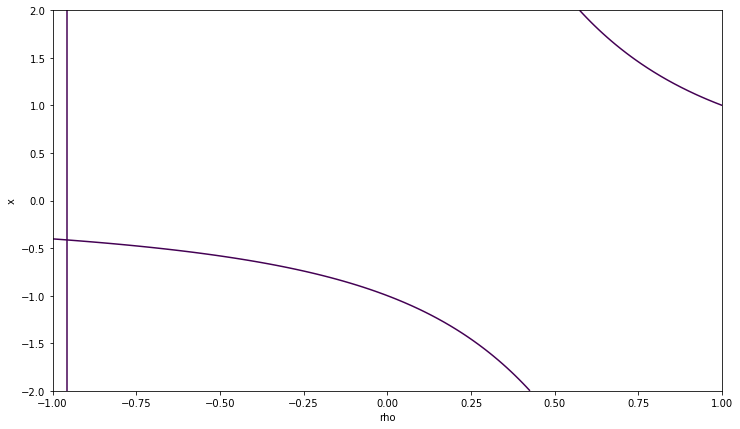

In [1389]:
gs =0.1
x1 = -1.0
x2 = 1.0
a = 0.1
b = 0.9
rho1 = -1.0
rho2 = 1.0
DG = lambda x: -2.0*gs*(x - x1)*np.exp(-gs*((x - x1)**2)) 
DF = lambda x: -2.0*gs*(x - x2)*np.exp(-gs*((x - x2)**2))
DH = lambda rho, x: rho*DF(x) - (1 - rho)*DG(x)
frho = lambda rho, x: -(rho - rho1)*(rho - rho2)*(rho - (rho1+rho2)/2.0) - \
                        0.5*(1-a)*(rho - rho1) - 0.5*(1-b)*(rho - rho2)

xr = np.linspace(-2.0, 2.0, 100)
rhor = np.linspace(-1, 1, 100)
Rg,Xg = np.meshgrid(rhor, xr)

plt.contour( Rg, Xg, DH(Rg, Xg), [0] )
plt.contour( Rg, Xg, frho(Rg, Xg), [0] )
plt.xlabel('rho')
plt.ylabel('x')
plt.show()



Now the drives

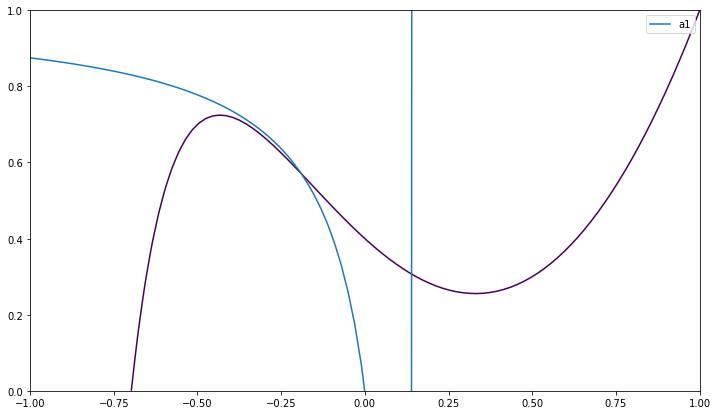

In [1390]:
mu = 0.1
gamma = 0.7
b = 0.4
rho1 = -1.0
rho2 = 1.0
a1 = lambda rho: -gamma*rho/(mu -gamma*rho)
Jp = lambda rho, a: -(rho - rho1)*(rho - rho2)*(rho - (rho1+rho2)/2.0) - 0.5*(1-a)*(rho - rho1) - 0.5*(1-b)*(rho - rho2)

ar = np.linspace(0.0, 1.0, 100)
rhor = np.linspace(-1, 1, 100)
Rg,Ag = np.meshgrid(rhor, ar)

plt.plot(rhor, a1(rhor))
plt.contour( Rg, Ag, Jp(Rg, Ag), [0])
plt.legend(("a1", "Potential"))
plt.axis([-1, 1, 0, 1])
plt.show()


Comparing the two systems' evolution

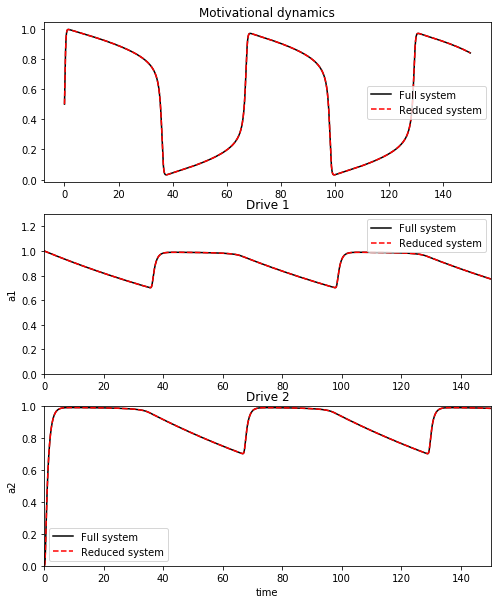

In [1391]:
T = 30000
tau1 = tau2 = tau = 0.01
sigma = 20.0
rho1 = 0.0
rho2 = 1.0

f1 = lambda t, x: np.array([-tau*x[0] + (1.0 - x[0])*np.exp(-sigma*(x[2] - rho1)**2),
                  -tau*x[1] + (1.0 - x[1])*np.exp(-sigma*(x[2] - rho2)**2),
                  -8.0*((x[2] - rho1)*(x[2] - rho2)*(x[2] - (rho1+rho2)/2.0) + 
                    (1.0/4.0)*(1-x[0])*(x[2] - rho1) + (1.0/4.0)*(1-x[1])*(x[2] - rho2))])
L = 1.0
def f2(t, theta):
    a1 = theta[0]
    a2 = theta[1]
    rhox = theta[2]
    rhoy = theta[3]
    
    psy = np.array([(-tau*a1 + 1.0*(1-a1)*np.exp(-sigma*((rhoy)**2))),
                    (-tau*a2 + 1.0*(1-a2)*np.exp(-sigma*((rhox)**2 ))),
                    -2.0*L*((rhox-c)*(rhox**2 + (rhoy - c)**2) + rhox*((rhox - c)**2 + rhoy**2) + (1-a1)*(rhox-c) + (1-a2)*rhox),
                    -2.0*L*((rhoy-c)*(rhoy**2 + (rhox - c)**2) + rhoy*((rhoy - c)**2 + rhox**2) + (1-a2)*(rhoy-c) + (1-a1)*rhoy)])

    return psy

t, X1 = integrate( f2, T, [1.0, 0.0, 0.5, 0.5] )
t, X2 = integrate( f1, T, [1.0, 0.0, 0.5] )

fig, ax = plt.subplots(3,1, figsize = (8, 10))

# ax[0].plot(t, X1[2,:] , 'k')
ax[0].plot(t, X1[3,:], 'k', label = 'Full system')
ax[0].plot(t, X2[2,:], 'r--', label = 'Reduced system')
ax[0].set_title('Motivational dynamics')
ax[0].legend()

ax[1].plot(t,X1[0,:], 'k', label = 'Full system')
ax[1].plot(t, X2[0,:], 'r--', label = 'Reduced system')
ax[1].set_ylabel('a1')
ax[1].axis([0, T*h, 0, 1.3])
ax[1].set_title('Drive 1')
ax[1].legend()

ax[2].plot(t,X1[1,:], 'k', label = 'Full system')
ax[2].plot(t,X2[1,:], 'r--', label = 'Reduced system')
ax[2].set_ylabel('a2')
ax[2].axis([0, T*h, 0, 1])
ax[2].set_xlabel('time')
ax[2].set_title('Drive 2')
ax[2].legend()
plt.show()



0.44887671141887775


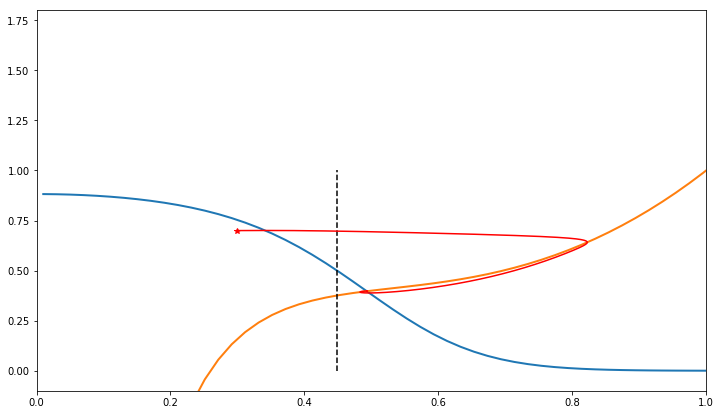

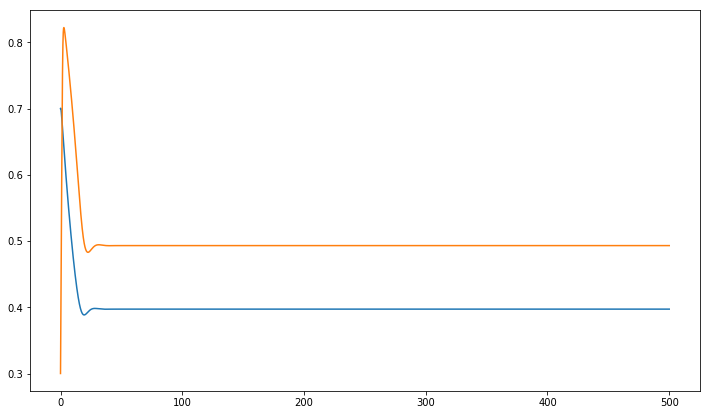

In [1497]:
fig = plt.figure()
T = 100000
tau = 4.0
gamma1 = 30.0
sigma = 10.0
a2 = 0.4#0.74357
k = -0.5
rho1 = 0.0
rho2 = 1.0
epsilon = 0.01

G = lambda rho: np.exp(-sigma*((rho - rho1)**2))
a1_f = lambda rho: (gamma1*G(rho) )/(tau + gamma1*G(rho))
a_p =  lambda rho, a2: 4*((rho - rho1)*(rho- rho2)*(rho - (rho1+rho2)/2.0) + (1.0/4.0)*(1-a2)*(rho - rho2))/(rho - rho1) + 1

rhor = np.linspace(0.01, 2, 100)
L = 1.0
# f1 = lambda t, x: np.array([-tau*(x[0]) + gamma1*(1.0 - (x[0]))*(G(x[2])),
#                   0.0,
#                   -8.0*L*((x[2] - rho1)*(x[2] - rho2)*(x[2] - (rho1+rho2)/2.0) + 
#                     (1.0/4.0)*(1-x[0])*(x[2] - rho1) + (1.0/4.0)*(1-x[1])*(x[2] - rho2))])

f1 = lambda t, x: np.array([epsilon*(-tau*(x[0]) + gamma1*(1 - x[0])*(G(x[2]))),
                  0.0,
                  -8.0*L*((x[2] - rho1)*(x[2] - rho2)*(x[2] - (rho1+rho2)/2.0) + 
                    (1.0/4.0)*(1-x[0])*(x[2] - rho1) + (1.0/4.0)*(1-x[1])*(x[2] - rho2))])

t,X = integrate( f1, T, [0.7, a2, 0.3] )

# plt.contour( Rg, Ag, Jp(Rg, Ag, 0.9), [0])
plt.plot(rhor, a1_f(rhor), linewidth = 2.0)
plt.plot(rhor, a_p(rhor, a2), linewidth = 2.0)
rho_c = np.sqrt(-(1.0/(2.0*sigma))*np.log(tau**2/gamma1**2))
print(rho_c)
plt.plot([rho_c, rho_c],[0, 1], 'k--')

plt.plot(X[2,:], X[0, :], 'r')
plt.plot(X[2,0], X[0, 0], 'r*')
plt.axis([0, 1, -0.1, 1.8])
plt.show()

plt.figure()
plt.plot(t, X[0,:])
plt.plot(t, X[2,:])
plt.show()

Trying to get a fast slow equivalent

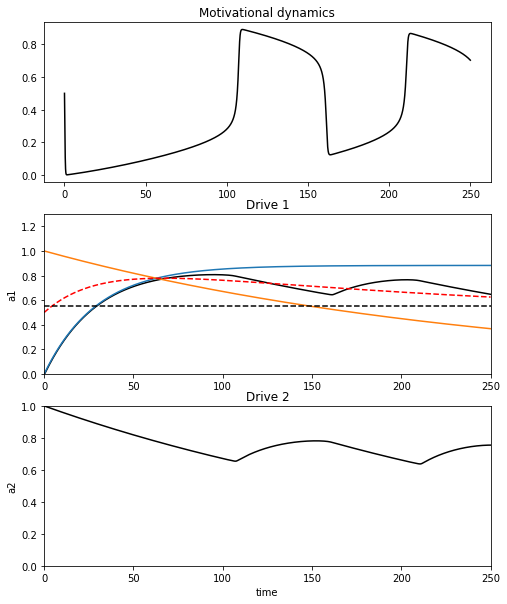

In [1489]:
T = 50000
tau1 = tau2 = tau = 4.0
sigma = 10.0
rho1 = 0.0
rho2 = 1.0
epsilon = 0.001
gamma = 30.0

f1 = lambda t, x: np.array([epsilon*(-tau*x[0] + gamma*(1.0 - x[0])*G(x[2])),
                            epsilon*(-tau*x[1] + gamma*(1.0 - x[1])*G(1-x[2])),
                           -8.0*((x[2] - rho1)*(x[2] - rho2)*(x[2] - (rho1+rho2)/2.0) + 
                            (1.0/4.0)*(1-x[0])*(x[2] - rho1) + (1.0/4.0)*(1-x[1])*(x[2] - rho2))])

t, X1 = integrate( f1, T, [0.0, 1.0, 0.5] )

fig, ax = plt.subplots(3,1, figsize = (8, 10))

a = tau
b = gamma
ss = lambda t: (b/(a + b))*(1 - np.exp(-epsilon*(a + b)*t))
sf = lambda t: np.exp(-epsilon*a*t)

# ax[0].plot(t, X1[2,:] , 'k')
ax[0].plot(t, X1[2,:], 'k')
ax[0].set_title('Motivational dynamics')

ax[1].plot(t,X1[0,:], 'k')
ax[1].plot(t, ss(t))
ax[1].plot(t, sf(t))
ax[1].plot(t, (sf(t) + ss(t))/2.0, 'r--')
vm = 0.5*((1.0/a + b/(a + b) - b/((a + b)**2)))
ax[1].plot([0, T*h], [vm, vm], 'k--')
ax[1].set_ylabel('a1')
ax[1].axis([0, T*h, 0, 1.3])
ax[1].set_title('Drive 1')


ax[2].plot(t,X1[1,:], 'k')
ax[2].set_ylabel('a2')
ax[2].axis([0, T*h, 0, 1])
ax[2].set_xlabel('time')
ax[2].set_title('Drive 2')
plt.show()

Exploring the nullcline parameters

/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars
/home/aljiro/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in divide
  """


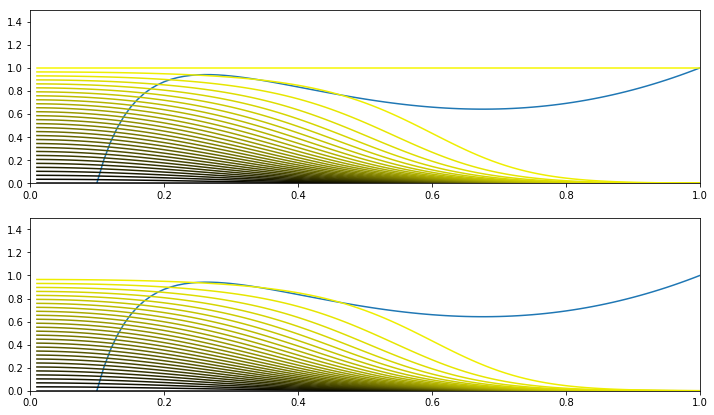

In [1511]:
a = 4.0
b = 30.0
a2 = 0.73
G = lambda rho: np.exp(-sigma*(rho**2))
a1_f = lambda rho, a, b: b*G(rho)/(a + b*G(rho))
a_p =  lambda rho, a2: 2*(rho*(rho-1.0)*(2*rho - 1.0) + (1.0/2.0)*(1-a2)*(rho - 1))/(rho) + 1
ass = np.linspace(0, 10, 30)
bs = np.linspace(0, 50, 30)
ps = np.linspace(0, 1, 30)
rho = np.linspace(0.01, 1, 100)

fig, ax = plt.subplots(3, 1)
ax[0].plot(rho, a_p(rho, a2))

for i in range(len(ps)):
    c = float(i)/float(len(ps))
    ac = b*(1 - ps[i])/ps[i]
    ax[0].plot(rho, a1_f(rho, ac, b), color = (c, c, 0))
    
ax[0].axis([0, 1, 0, 1.5])

ax[1].plot(rho, a_p(rho, a2))

for i in range(len(ps)):
    bc = a*ps[i]/(1 - ps[i])
    c = float(i)/float(len(ps))
    ax[1].plot(rho, a1_f(rho, a, bc), color = (c, c, 0))
    
ax[1].axis([0, 1, 0, 1.5])
plt.show()
